# Hands on tropical geometry

This is a minimal tutorial for 3d-printing tropical surfaces and tropical curves. The resulting digital models can also be used for high quality renders. 

For questions on or beyond the tutorial, visit the polymake forums: 
https://forum.polymake.org/

## Basic preperations for this notebook

<font color='red'>*This code cell should run before any of the others*</font>

In [1]:
script("files/3d_printing_with_x3d/3d_printing_helping_subs.pl");   # loading helper scripts 
# needs to be done before
application "tropical";

$x3d_dir="/tmp/x3ds/";                   # designated folder for x3d files (leave empty for current folder)
if (!-d $x3d_dir) { mkdir $x3d_dir; }    # create the folder if it does not exist

## Tropical surfaces

### A: creating tropical surfaces in polymake

A tropical surface in euclidean 3-space is also a tropical hypersurface, and the simplest way to create a tropical hypersurface is by specifying a tropical polynomial which cuts it out. This can be done through a suitable string. Note that **the polynomial needs to be homogeneous** and that the first coordinate will be set to 1 for the affine picture. To control which variable comes first, one can supplement an array of variable names.

In [2]:
$quadric = toTropicalPolynomial("min(1+2*w, 1+2*x, 1+2*y, 1+2*z, w+x, w+y, w+z, x+y, x+z, y+z)", qw( w x y z ));
$TQuadric = new Hypersurface<Min>(POLYNOMIAL=>$quadric);
$TQuadric->VISUAL;

<!--
polymake for knusper
Thu Aug 27 10:34:29 2020
TQuadric
-->


 
 
 
 TQuadric 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

Click here for additional output 
 
polymake: used package atint
 [[wiki:external_software#a-tint]] is an extension for tropical intersection theory.
 (C) 2011 - 2015 Simon Hampe, simon.hampe@googlemail.com
 See also: https://github.com/simonhampe/atint 
polymake: used package cdd
 cddlib
 Implementation of the double description method of Motzkin et al.
 Copyright by Komei Fukuda.
 http://www-oldurls.inf.ethz.ch/personal/fukudak/cdd_home/

polymake: used package threejs
 Three.js is a lightweight cross-browser JavaScript library/API used to create and display animated 3D computer graphics on a Web browser.
 See http://github.com/mrdoob for the source code.

Alternatively, one can specify the polynomial through an exponent matrix and a coefficient vector.

In [3]:
$mQuadric = [ [2,0,0,0], [0,2,0,0], [0,0,2,0], [0,0,0,2],
              [1,1,0,0], [1,0,1,0], [1,0,0,1],
              [0,1,1,0], [0,1,0,1], [0,0,1,1]];
$cQuadric = [1,1,1,1,0,0,0,0,0,0];
$TQuadric = new Hypersurface<Min>(MONOMIALS=>$mQuadric, COEFFICIENTS=>$cQuadric);
$TQuadric->VISUAL;

<!--
polymake for knusper
Thu Aug 27 10:34:29 2020
TQuadric
-->


 
 
 
 TQuadric 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

### B: exporting tropical surfaces from polymake

There are many options one can pass to a VISUAL routine in Polymake in order to customize the look of the exported 3d-model. Some of them are useful for 3d printing, others should rather stay hidden. The most basic configuration is the following, which tells polymake not to visualize the vertices and edges.

In [4]:
$surface_opts = {VertexStyle=>'hidden', EdgeStyle=>'hidden'};
x3d($TQuadric->VISUAL($surface_opts), File=>$x3d_dir."filename.x3d");

One can also explicitely specify the bounding box of the model. This is very useful when creating one model from multiple objects, e.g., a tropical curve on a tropical surface. The first line below creates a bounding box around the vertices of the tropical surface:

In [5]:
$bFacets = polytope::bounding_box_facets($TQuadric->affine_chart->VERTICES,offset=>1,surplus_k=>0.4, make_cube=>1);
x3d($TQuadric->VISUAL($surface_opts,BoundingFacets=>$bFacets),File=>$x3d_dir."TQuadric.x3d");

For more options, please see the polymake tutorial on visualization.

### C: solidifying tropical surfaces

All 3d printable models need volume. This can be done by solidifying the surface in Blender and/or Polymake.

#### Option A: Blender

The following tutorial was made in blender 2.81.
1. Import the previously exported x3d file of the surface,
    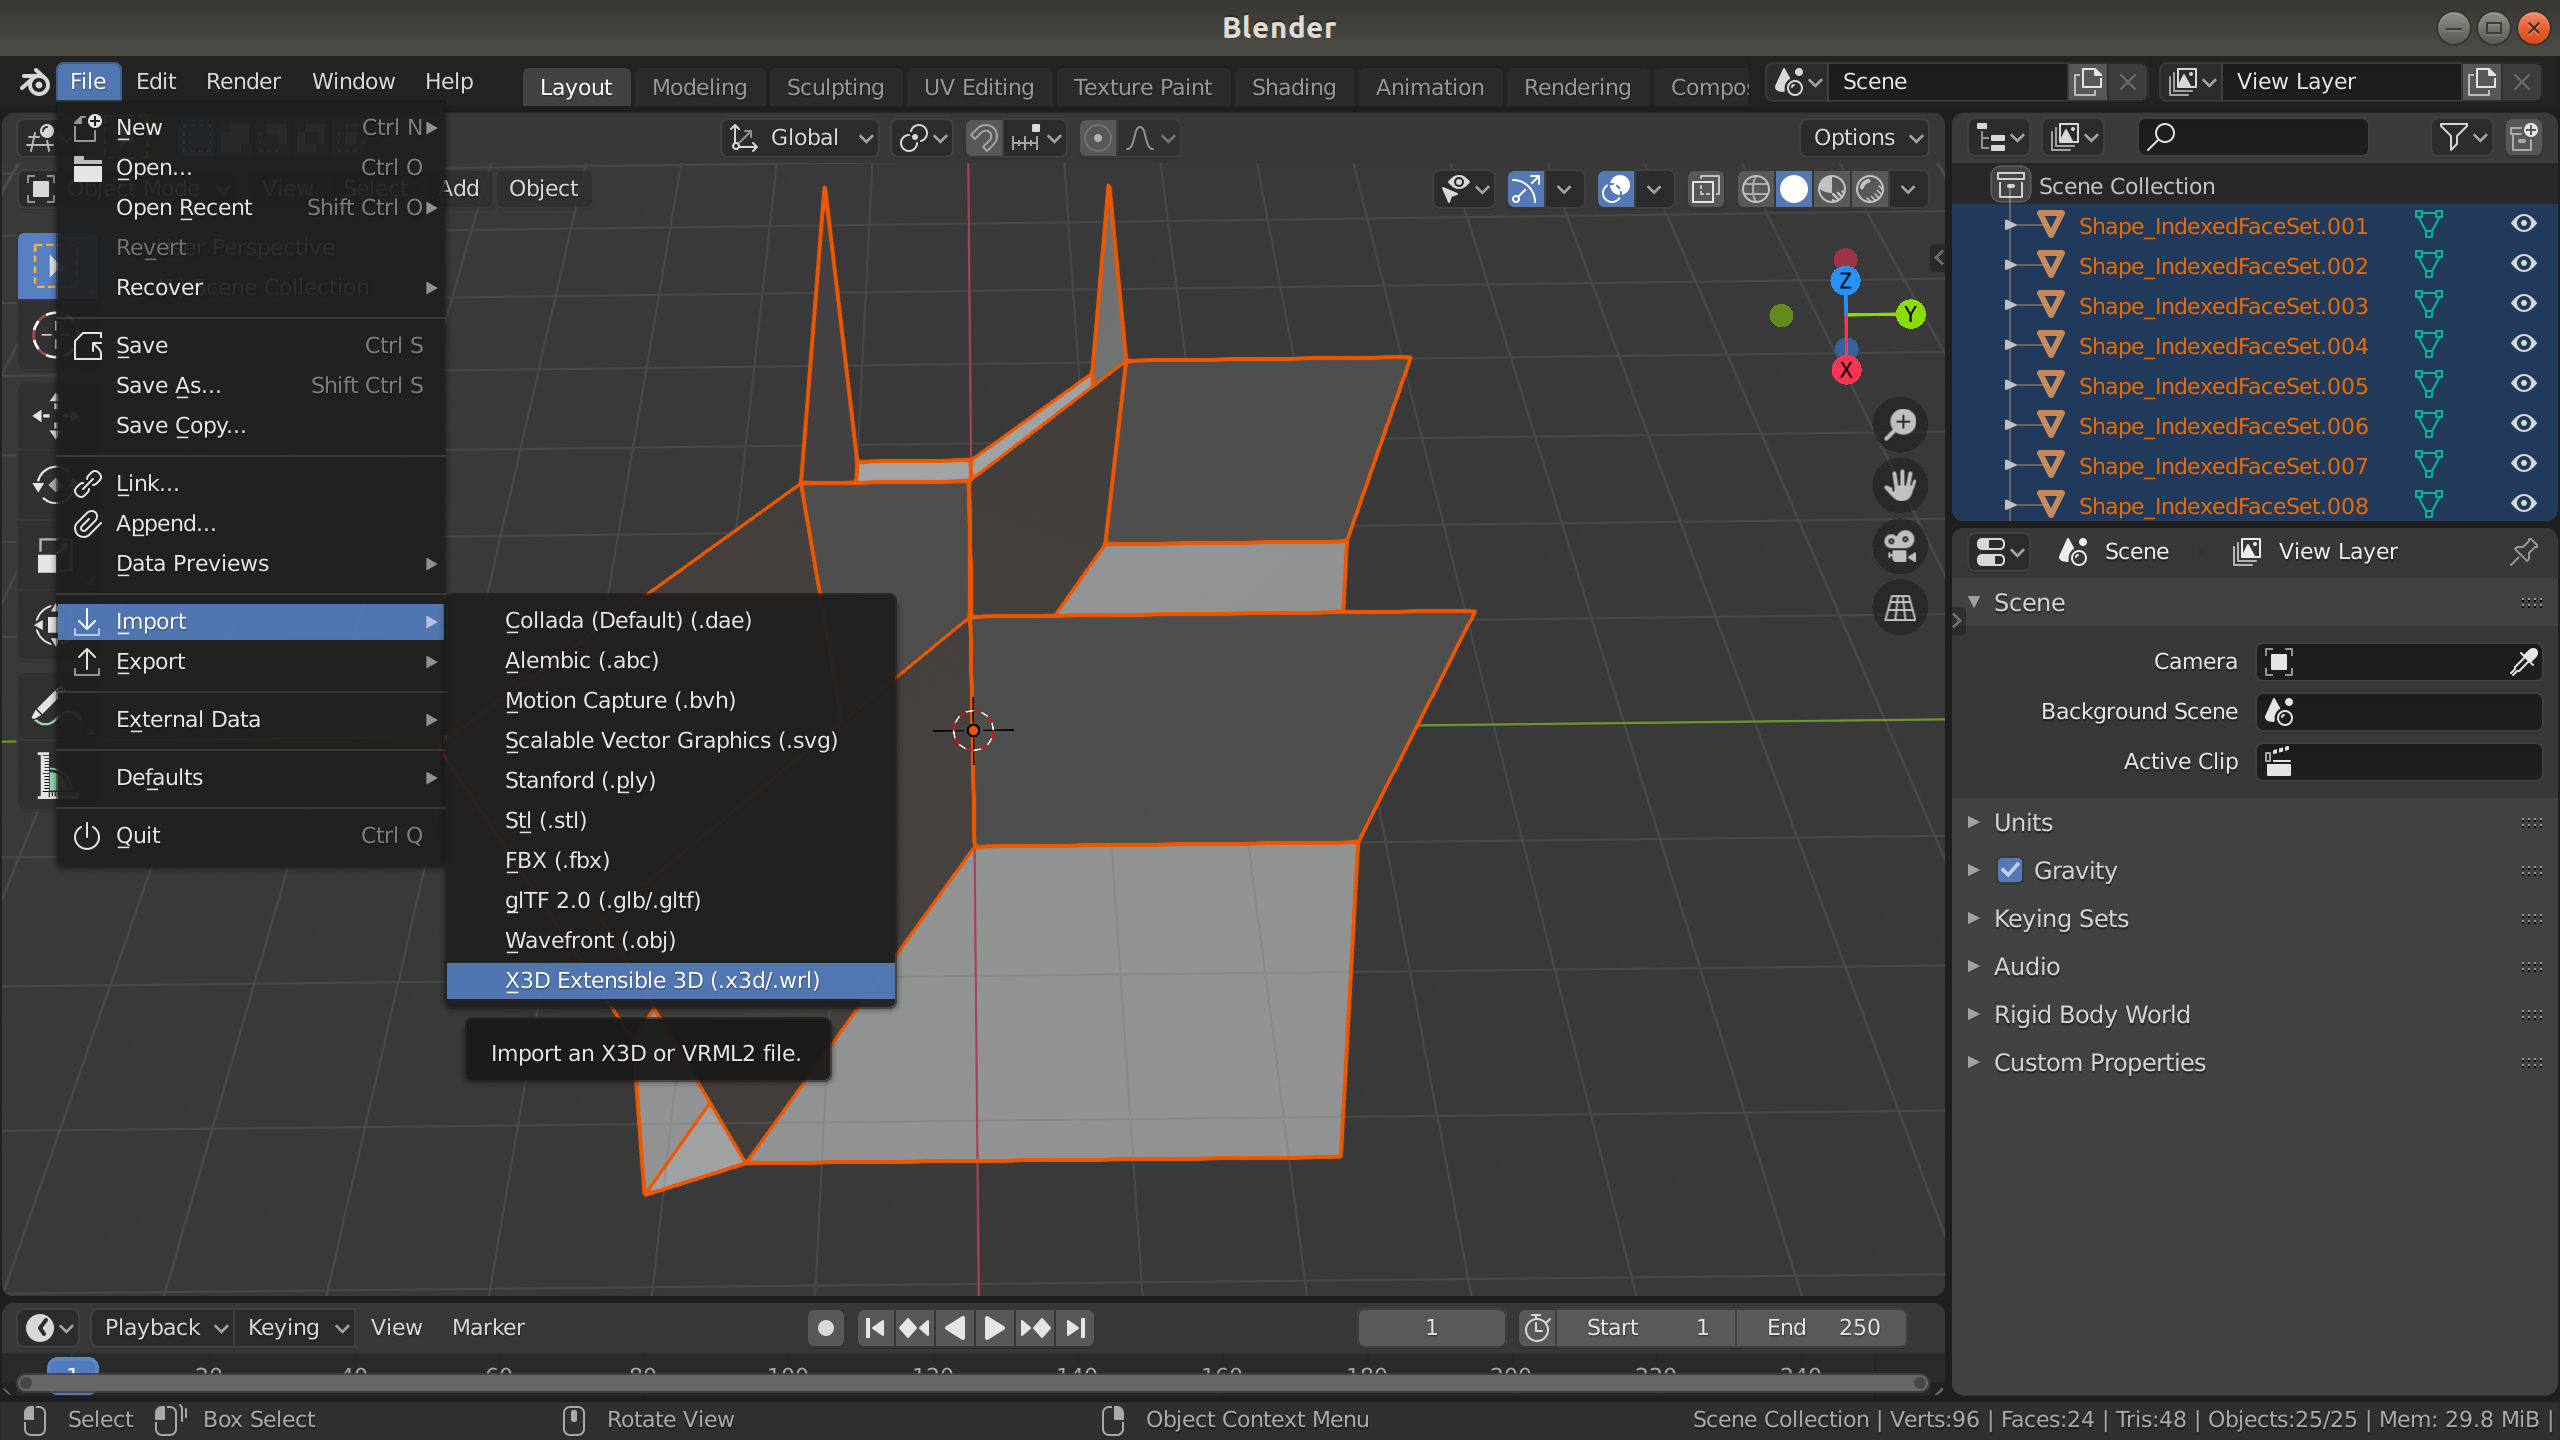

2. Select all layers (click onselect single layer, press 'A') and join them
    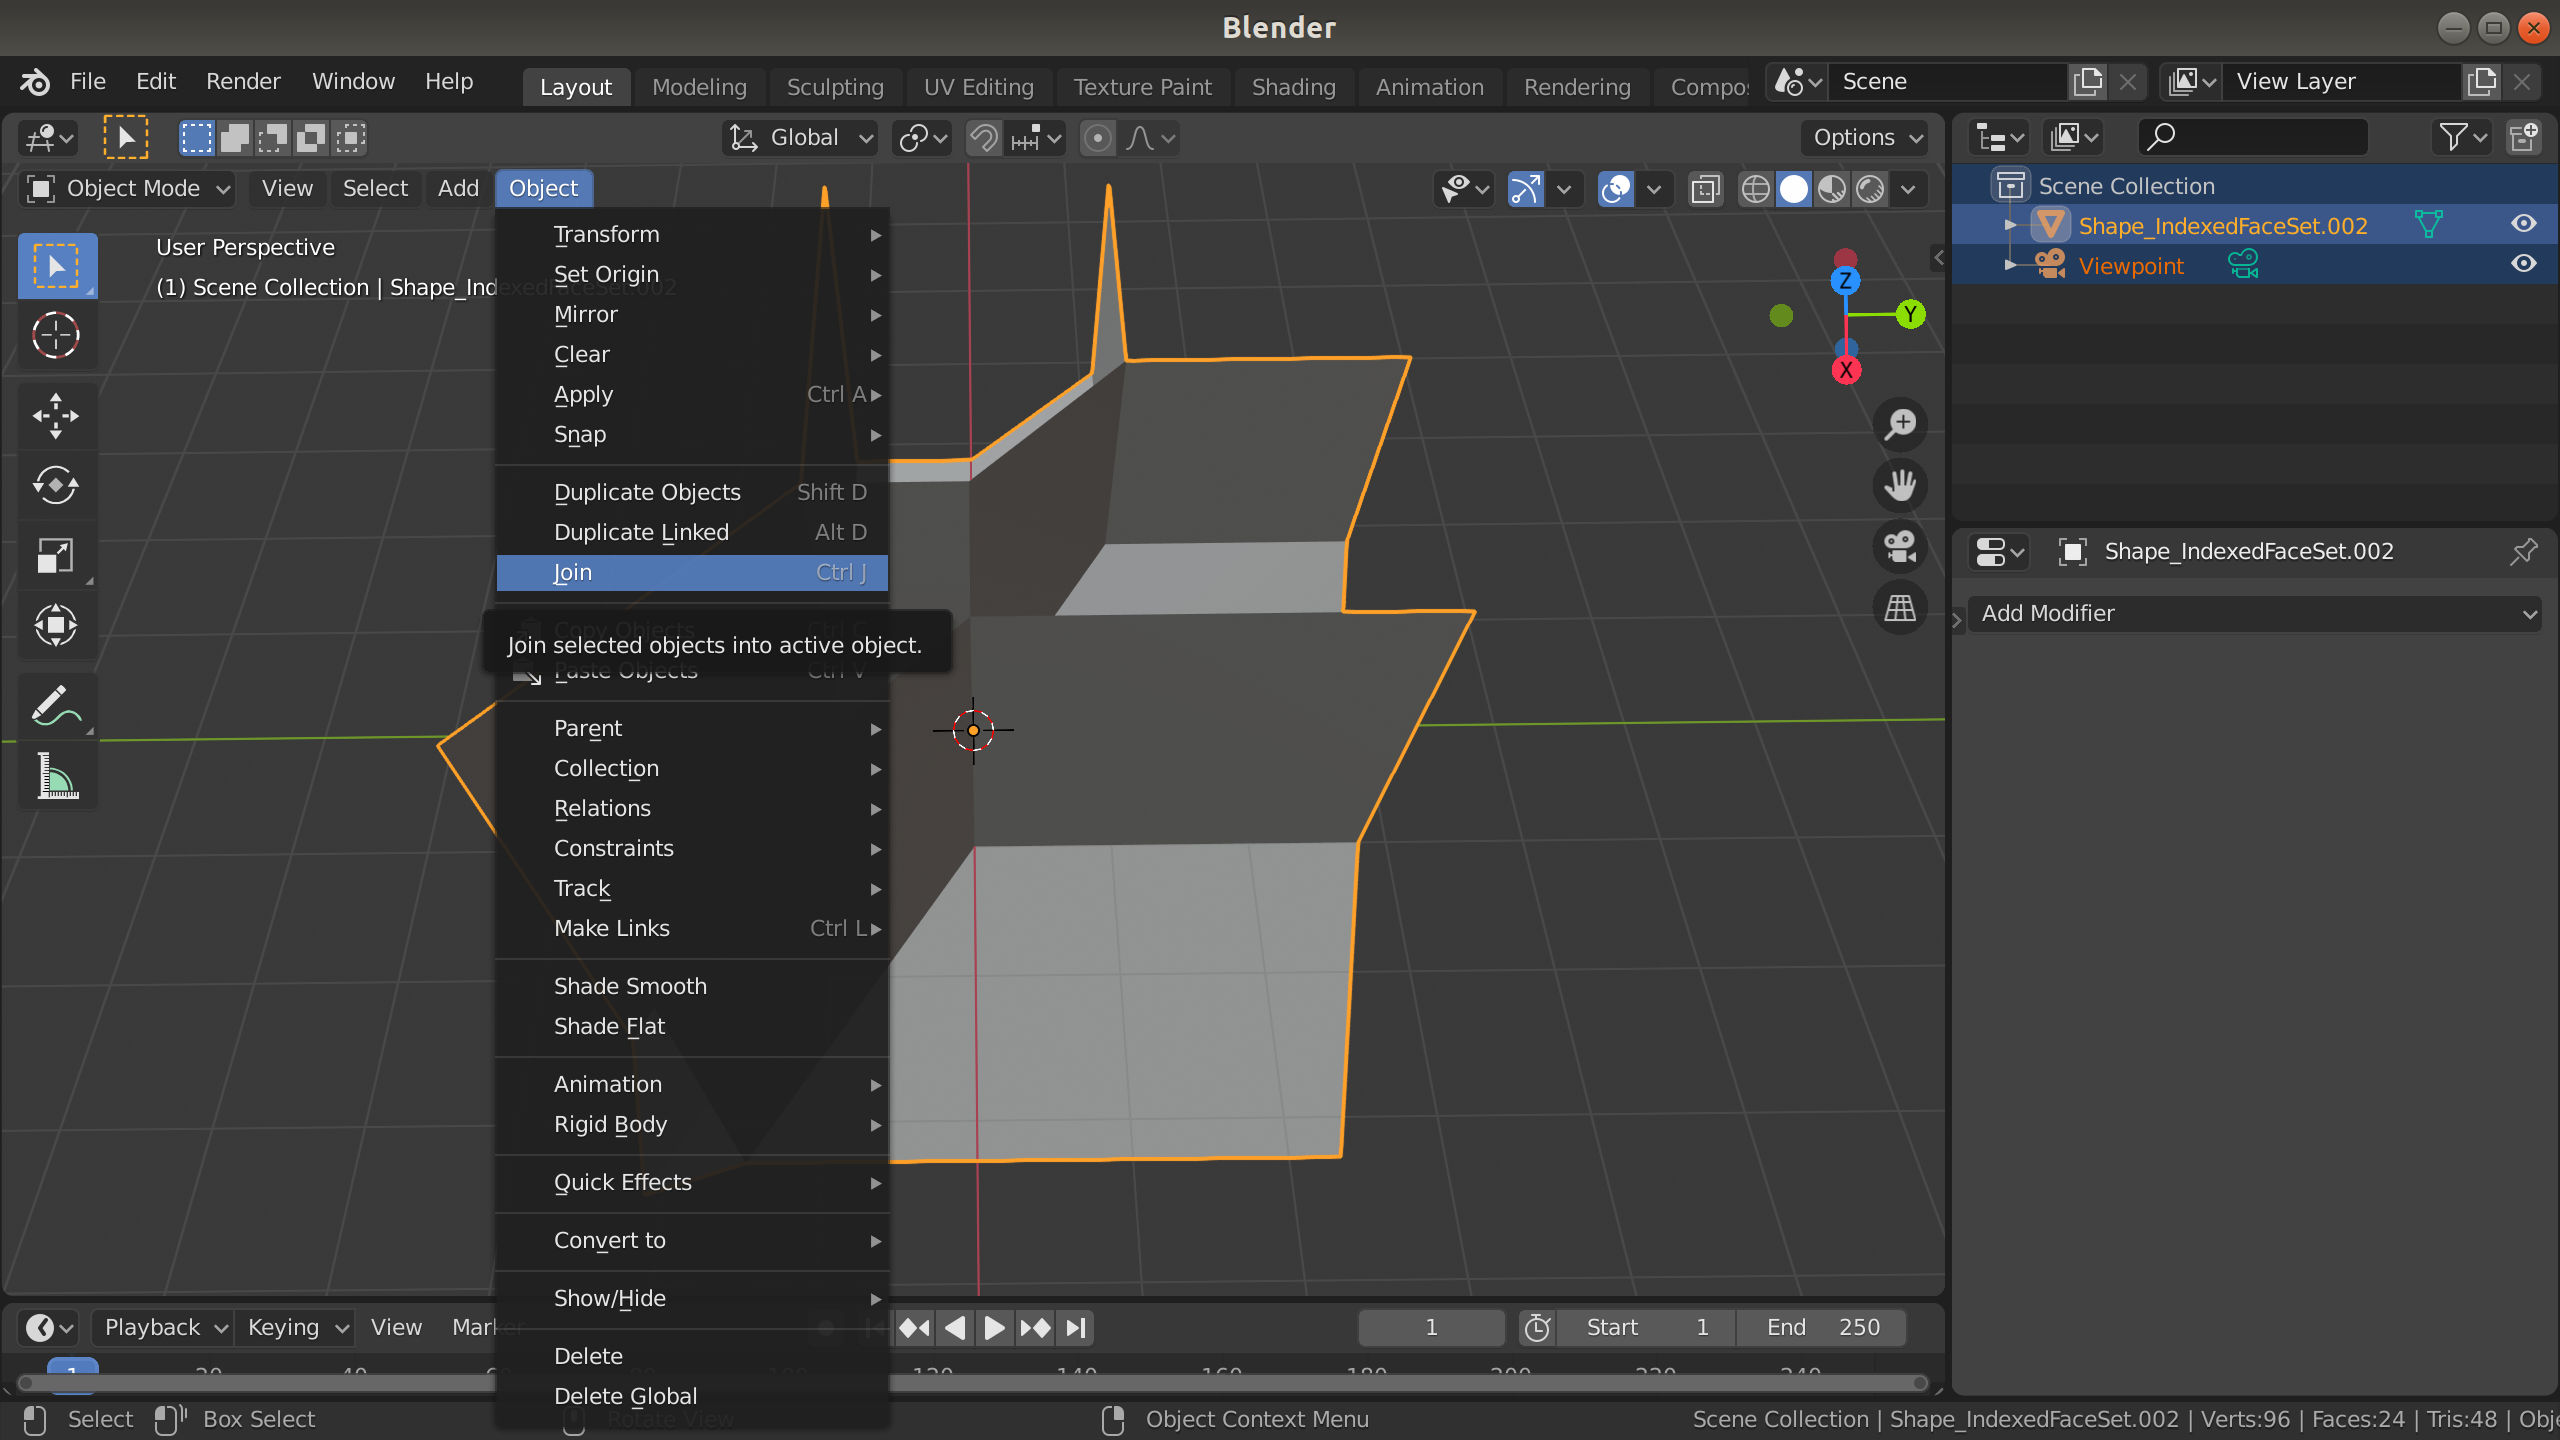

3. Select modifier properties
    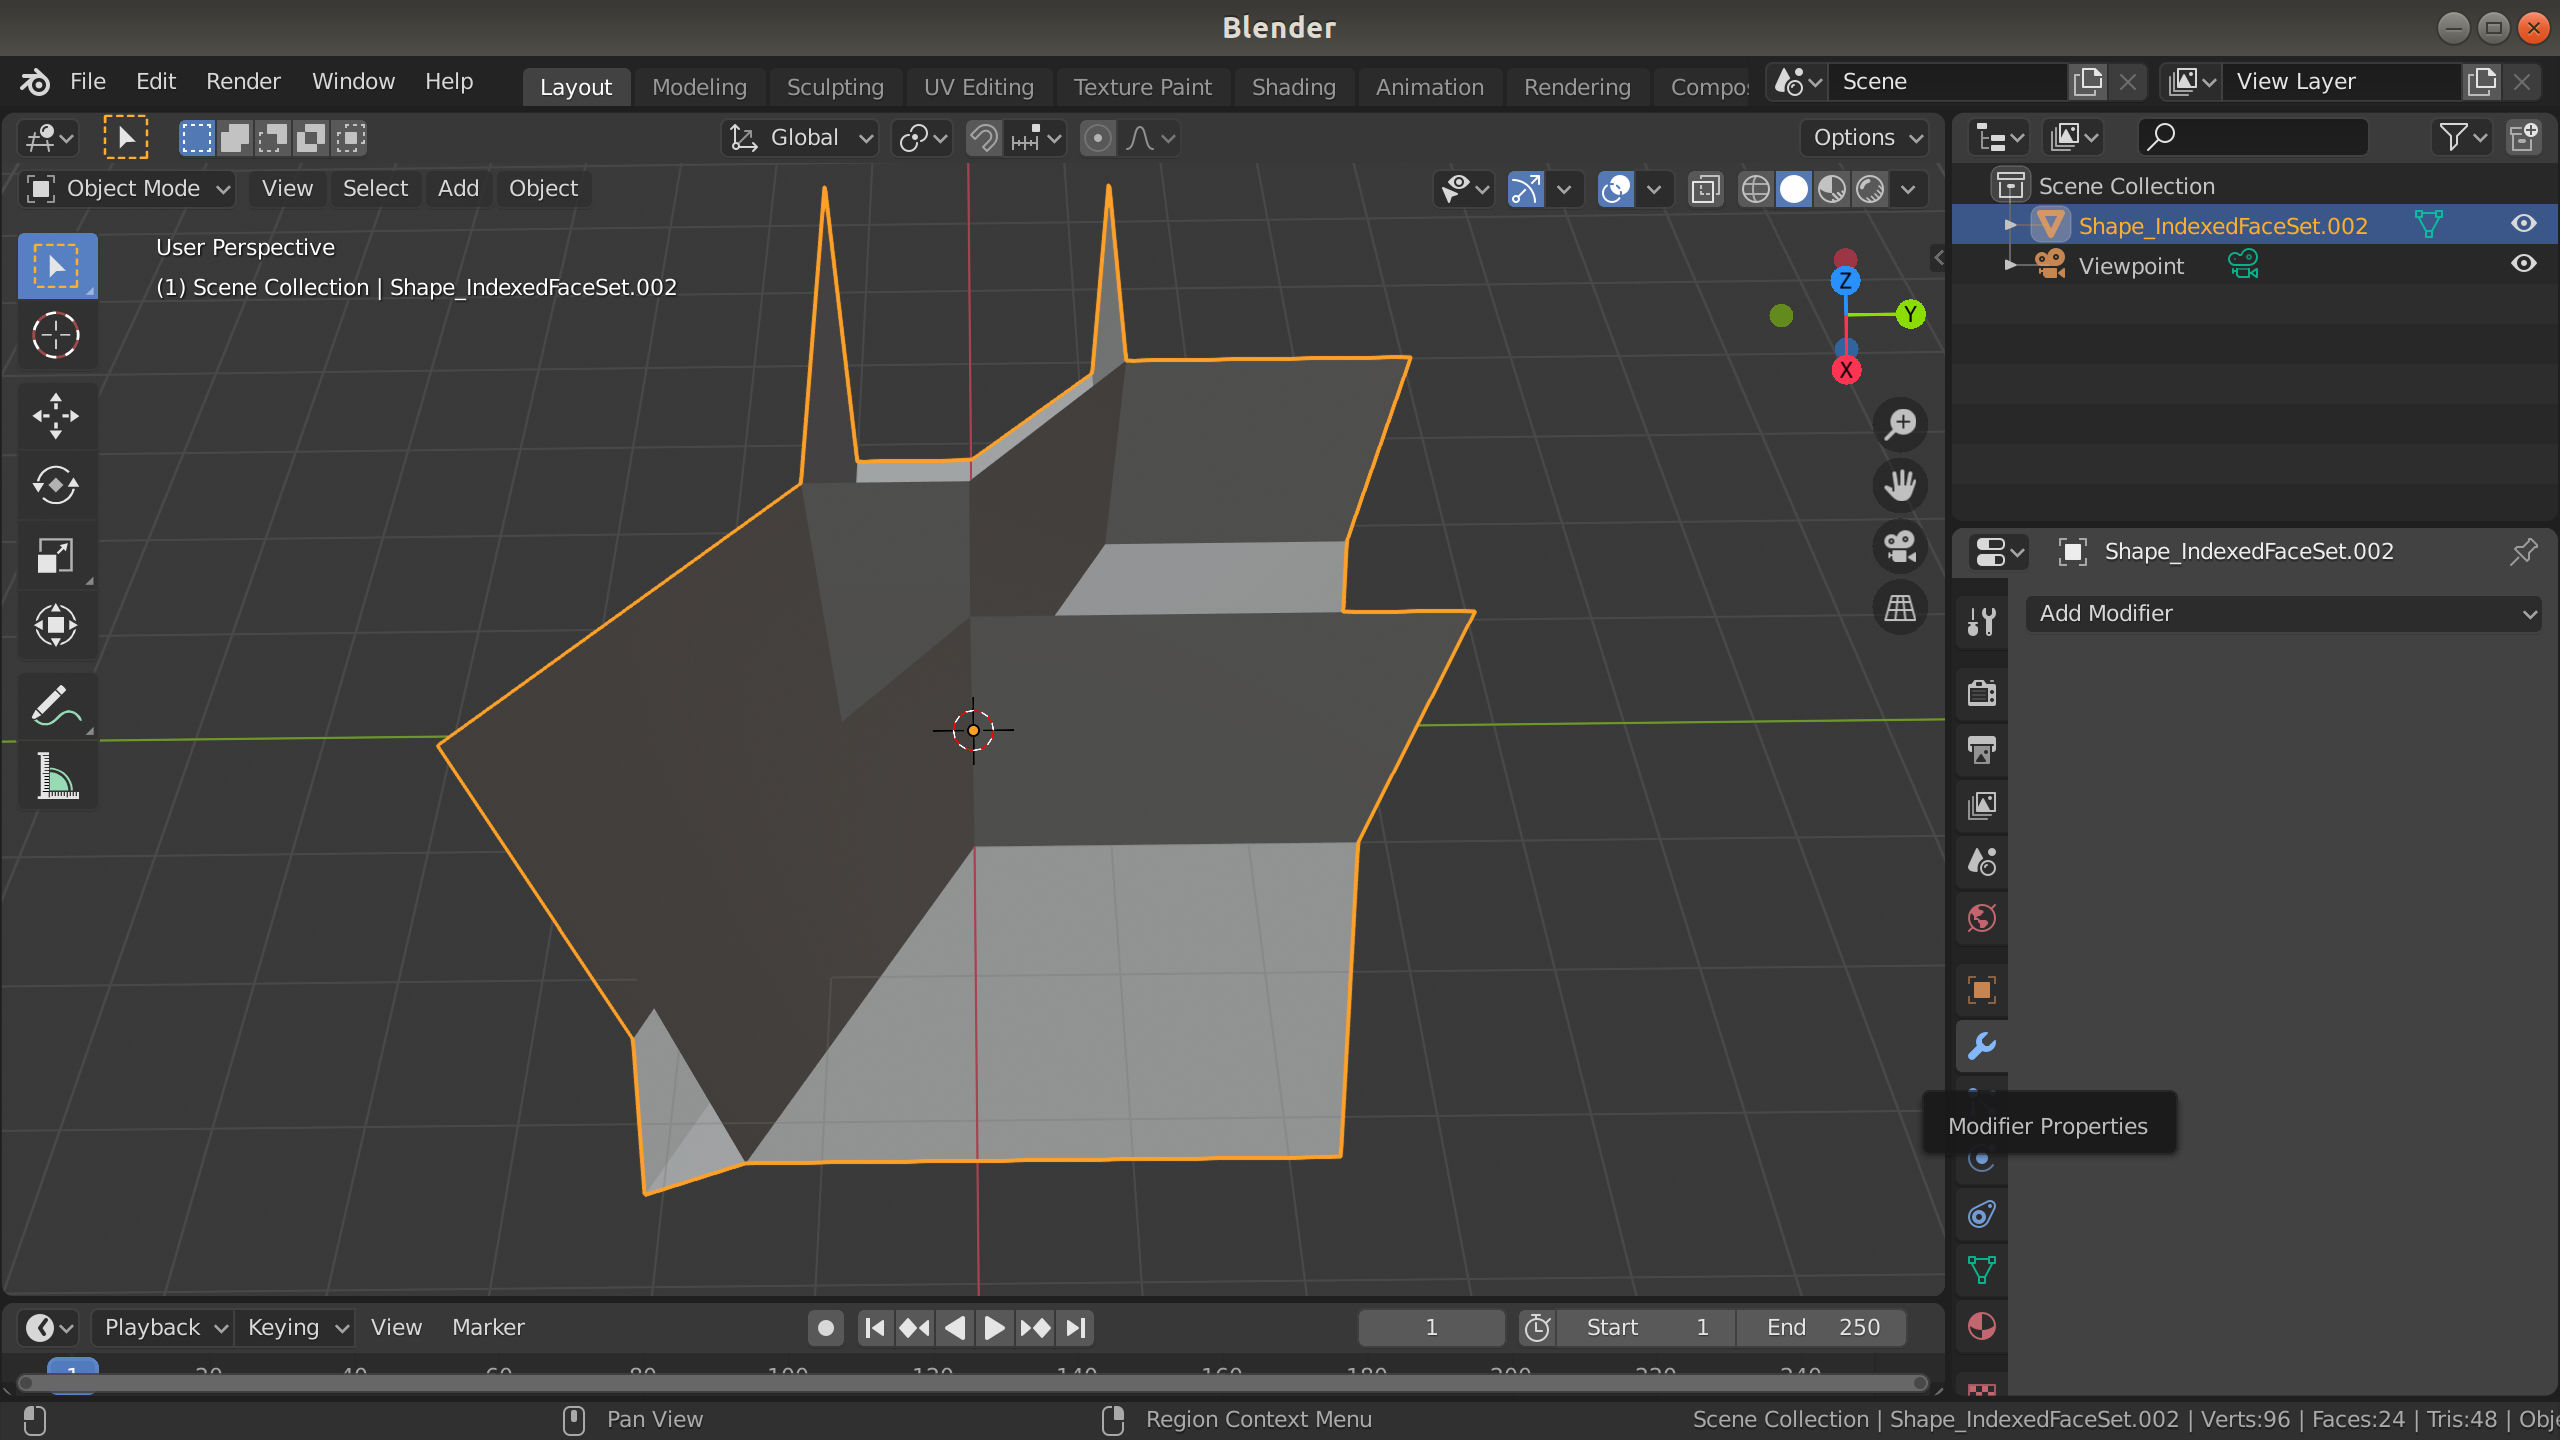

4. Add a **Solidify** modifier, set *Offset* to 0 and *Thickness* sufficiently large
    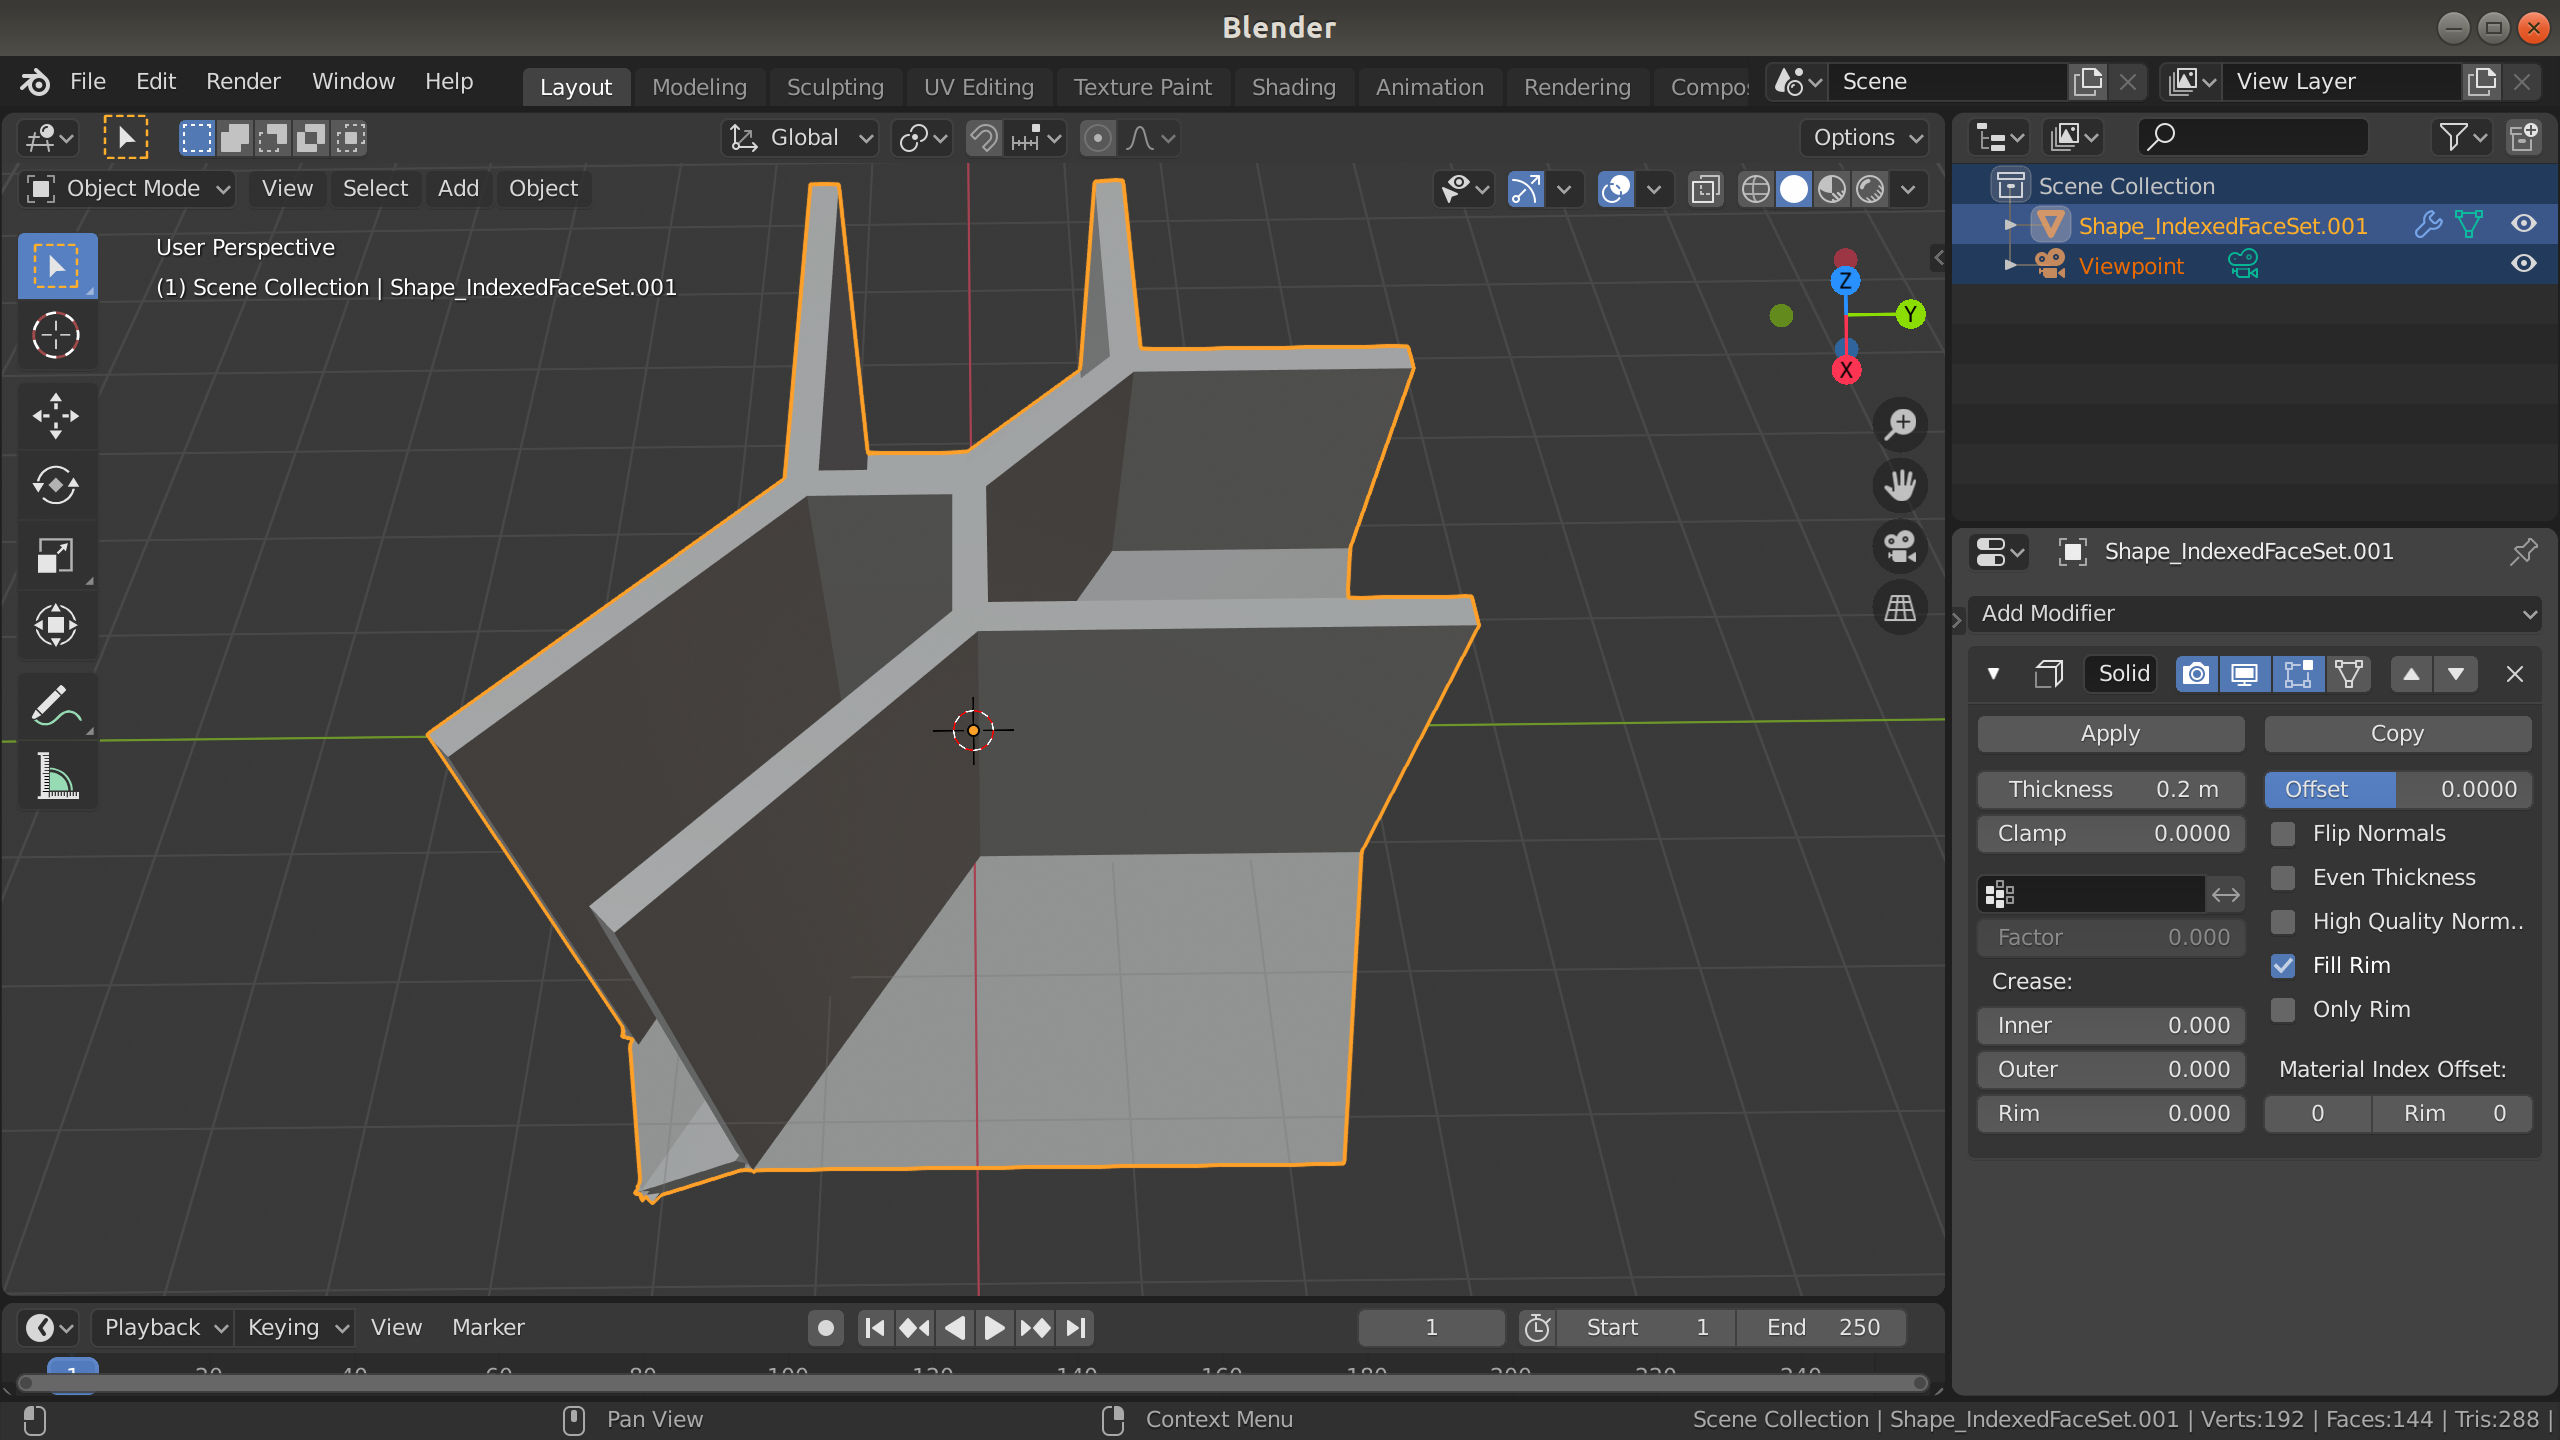

5. Add a **Bevel** modifier and adjust *Segments*, *Width* (optional)  
    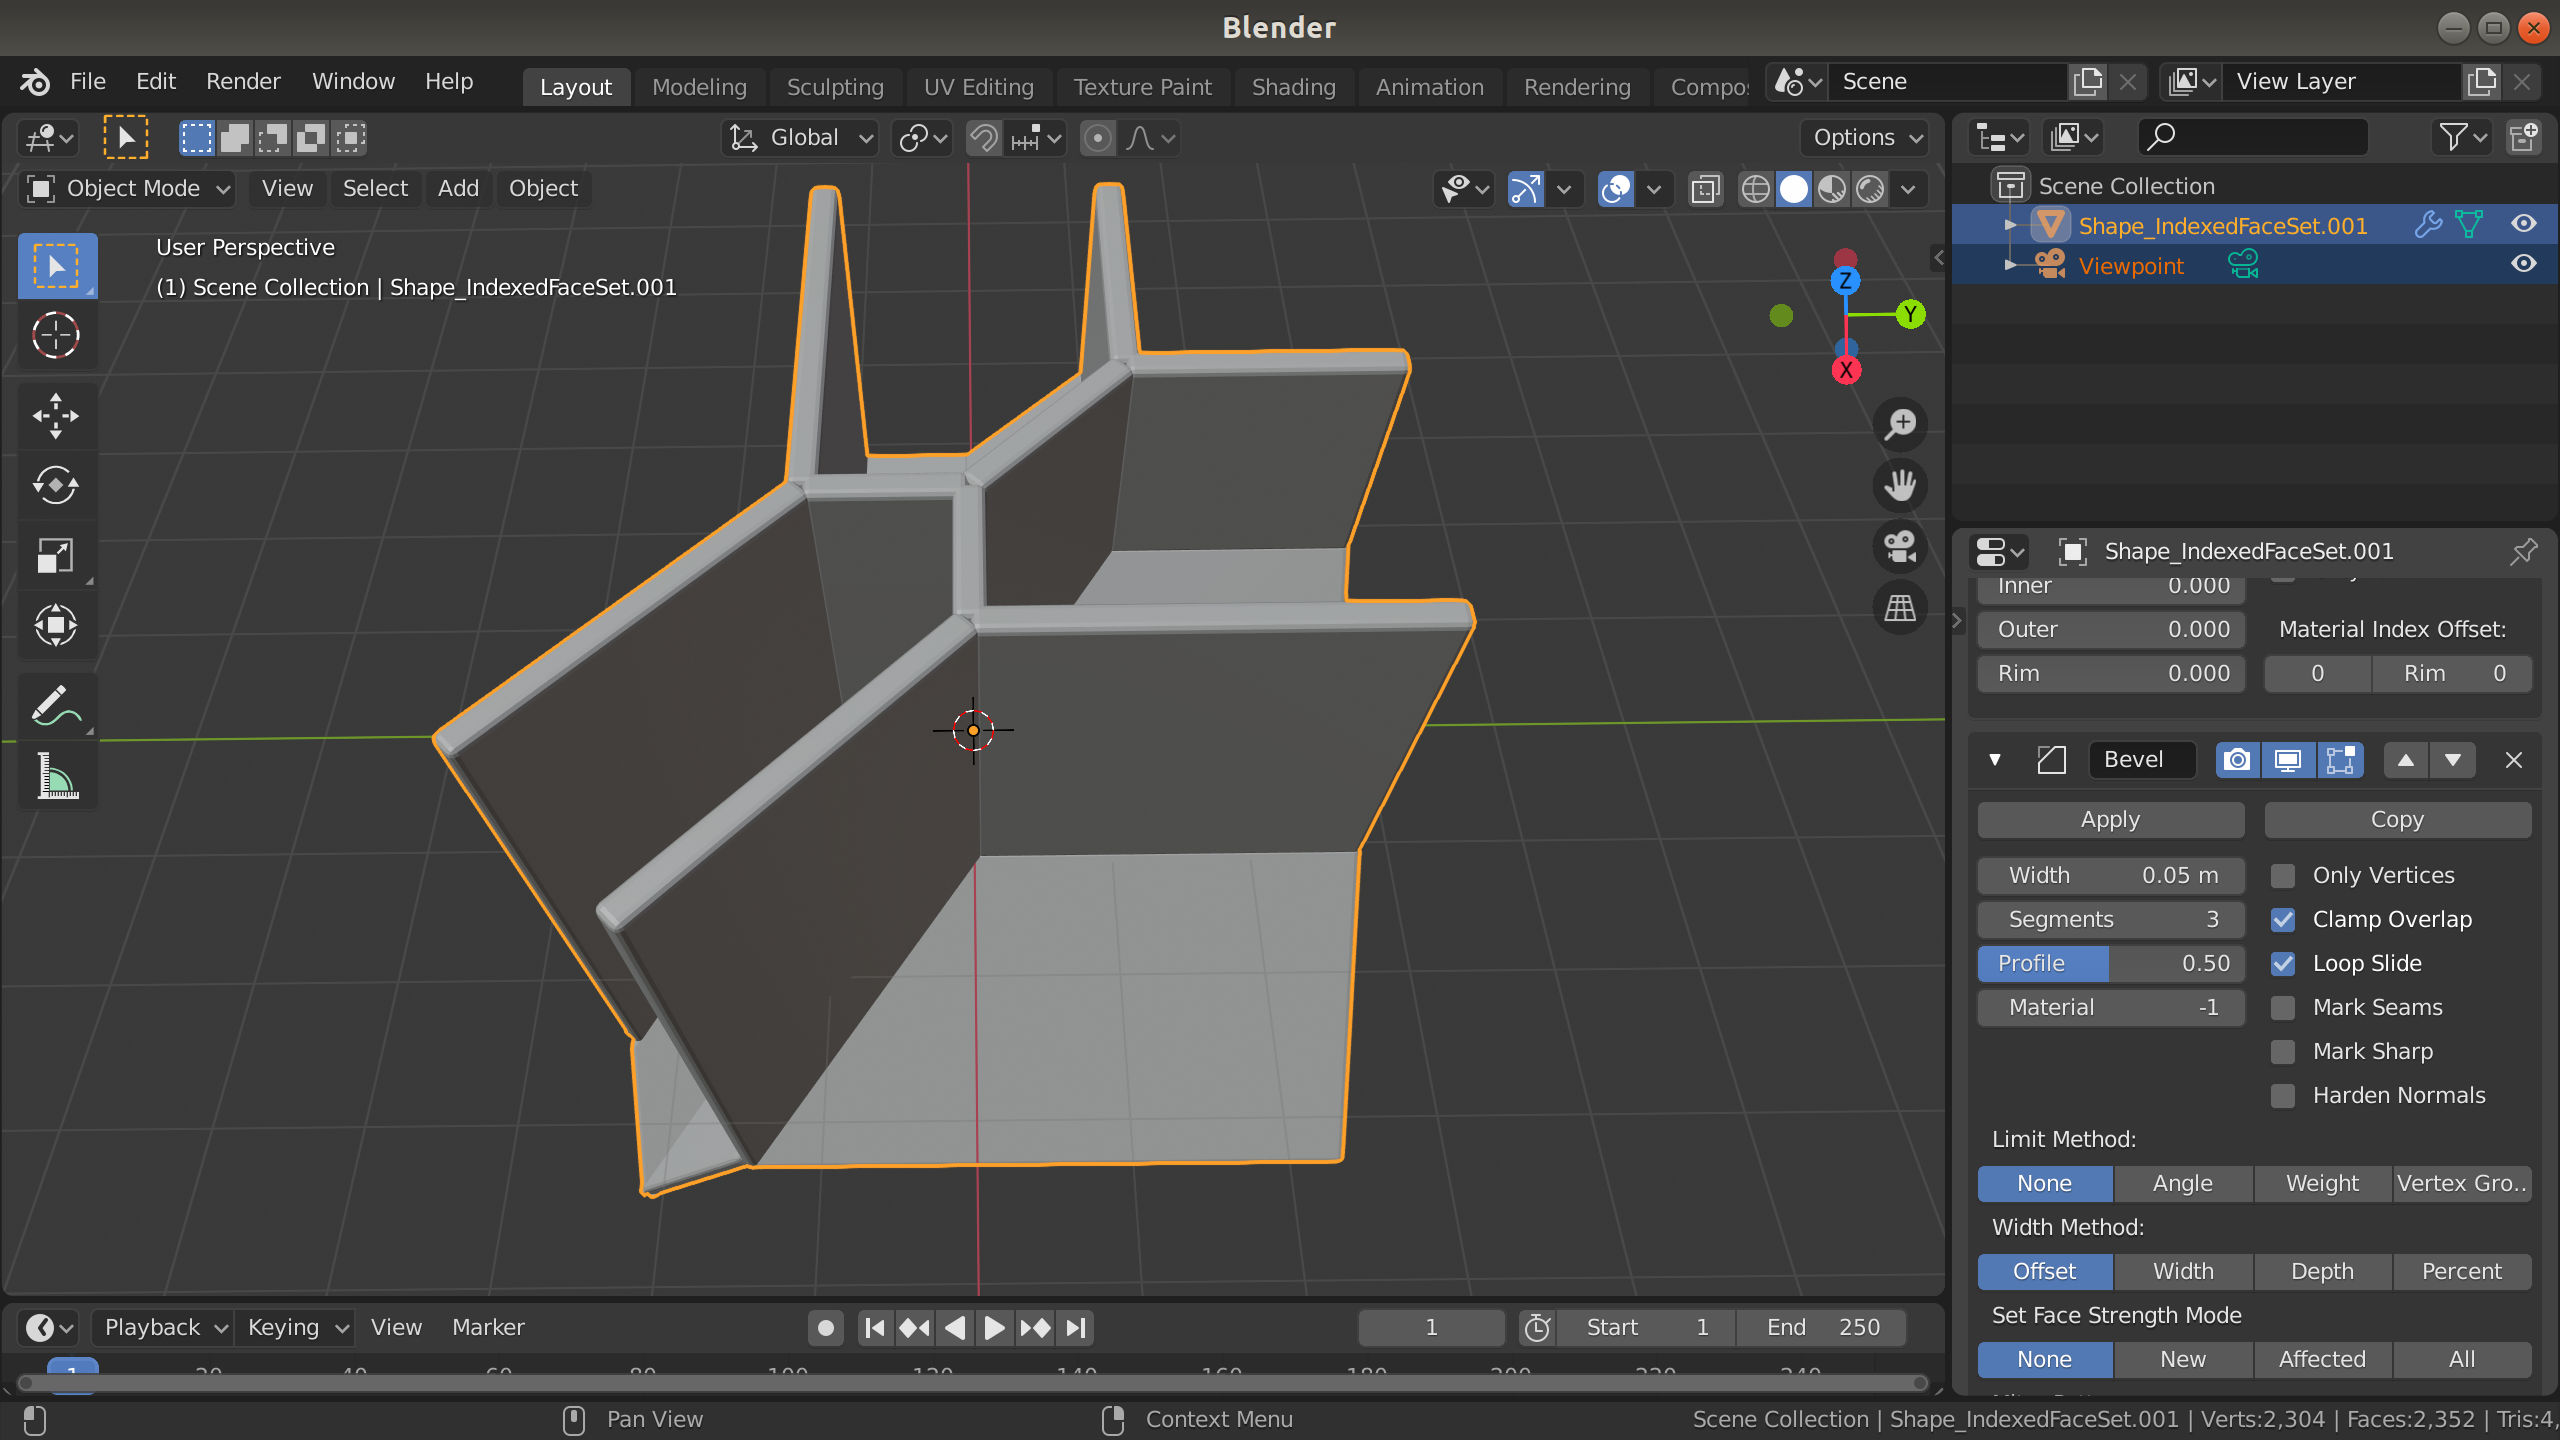

#### Option B: in polymake

To solidify the surface in polymake, we need to decide on the planned size of the model and the desired cell thickness. A minimal thickness of 2mm is recommended for printing with plastics.

In [6]:
$total_mm = 100;  #planned size of the model  
$surface_mm = 2;  #desired cell thickness

$bFacets = polytope::bounding_box_facets($TQuadric->affine_chart->VERTICES,offset=>1,surplus_k=>0.4, make_cube=>1);
$diam = $bFacets->[0]->[0] + $bFacets->[1]->[0];
$surface_abs = $surface_mm * $diam/$total_mm;     #absolute surface thickness in the x3d file
$solidifiedQuadricCells = solidify_2d_pcom($TQuadric->affine_chart,$surface_abs);
@solidifiedQuadricCellsVis = map { $_->VISUAL($surface_opts,BoundingFacets=>$bFacets) } @$solidifiedQuadricCells;
x3d(compose(@solidifiedQuadricCellsVis),File=>$x3d_dir."TQuadricSolidified.x3d");
compose(@solidifiedQuadricCellsVis);

<!--
polymake for knusper
Thu Aug 27 10:34:31 2020
_bounded
-->


 
 
 
 _bounded 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

## Tropical Curves

### A: creating tropical curves in polymake

The simplest way to construct tropical curves in polymake is to write them as the stable intersection of two tropical hypersurfaces.

In [7]:
$mQuadric = [ [2,0,0,0], [0,2,0,0], [0,0,2,0], [0,0,0,2],
              [1,1,0,0], [1,0,1,0], [1,0,0,1],
              [0,1,1,0], [0,1,0,1], [0,0,1,1]];
$cQuadric = [1,-1/4,-2/4,-3/4,-3/4,-4/4,-5/4,2/4,0,-2/4];
$TQuadric = new Hypersurface<Min>(MONOMIALS=>$mQuadric, COEFFICIENTS=>$cQuadric);
$mCubic = [ [3,0,0,0], [0,3,0,0], [0,0,3,0], [0,0,0,3],
            [1,1,1,0], [1,1,0,1], [1,0,1,1], [0,1,1,1],
            [2,1,0,0], [2,0,1,0], [2,0,0,1],
            [1,2,0,0], [1,0,2,0], [1,0,0,2],
            [0,2,1,0], [0,2,0,1], [0,1,2,0],
            [0,1,0,2], [0,0,2,1], [0,0,1,2]];
$cCubic = [3,3,3,3,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1];
$TCubic = new Hypersurface<Min>(MONOMIALS=>$mCubic, COEFFICIENTS=>$cCubic);
$TSextic = intersect($TQuadric,$TCubic);
$TSextic->VISUAL;

<!--
polymake for knusper
Thu Aug 27 10:34:32 2020
unnamed
-->


 
 
 
 unnamed 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

### B: exporting tropical curves from polymake

Unlike tropical hypersurfaces, preparing tropical curves for a 3d print is a bit more involved process. Since there is no satisfying way to solidify lines in default blender, we recommend using Polymake for solidification.

For that, we need to decide on a bounding box, the planned size of the model, and the desired edge / vertex thickness. The first line below creates a bounding box based on the vertices of the tropical curve:

In [8]:
$bFacets = polytope::bounding_box_facets($TSextic->affine_chart->VERTICES,offset=>1,surplus_k=>0.4, make_cube=>1);
$total_mm = 100; #planned size of the model   
$edges_mm = 2;   #desired edge diameter
$vertex_mm = 2;  #desired vertex diameter

$diam = $bFacets->[0]->[0] + $bFacets->[1]->[0];
$vertex_diam = ($vertex_mm*$diam/$total_mm)/(1-$vertex_mm/$total_mm);
$edges_diam = ($edges_mm*$diam/$total_mm)/(1-$vertex_mm/$total_mm);
# this subroutine (sourced above) returns a set of VISUAL options that
# make sure the curve ends up with the the calculated dimensions in the x3d file
$curve_opts = x3dprint_curve_opts($vertex_diam,$edges_diam);

# curves should be bounded beforehand to ensure all new vertices are also shown correctly
$bPolytope = new polytope::Polytope(FACETS=>$bFacets);
$bComplex = new fan::PolyhedralComplex(fan::check_fan_objects(($bPolytope)));
$TSexticBounded = pcom_common_ref($TSextic->affine_chart, $bComplex);
# export the curve
x3d($TSexticBounded->VISUAL($curve_opts),File=>$x3d_dir."TSextic.x3d");

### Step 3: framing tropical curves in polymake

For 3d-printing we recommend crafting a frame which stabilizes the curve. The easiest way to craft a frame is using the intersection of the bounding box facets and one of the two tropical hypersurfaces which cut out the curve.

In [9]:
$qFrame = pcom_common_ref($bPolytope->BOUNDED_COMPLEX,$TQuadric->affine_chart);
$cFrame = pcom_common_ref($bPolytope->BOUNDED_COMPLEX,$TCubic->affine_chart);
$qFrame->VISUAL; # visualizing frames
$cFrame->VISUAL;

<!--
polymake for knusper
Thu Aug 27 10:34:41 2020
pcom:
-->


 
 
 
 pcom: 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

<!--
polymake for knusper
Thu Aug 27 10:34:43 2020
pcom:
-->


 
 
 
 pcom: 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

These frames can be exported into separate models

In [10]:
x3d($qFrame->VISUAL($curve_opts),File=>$x3d_dir."QuadricFrame.x3d"); # exporting frames
x3d($cFrame->VISUAL($curve_opts),File=>$x3d_dir."CubicFrame.x3d");

## Tropical curves on tropical surfaces

3d-printing tropical curves on tropical surfaces is only minimally more involved than creating individual curves and surfaces. One straighforward way is to follow the previous tutorials for surfaces and curves while making sure that:

1. the curve is well visible, i.e., that the curve is sufficiently thick,
2. both curve and surface share the same bounding box.

Below we show a more involved way, which leads to a better final model. In this example we will employ a boolean intersection modifier to the curve in blender and the model will end up with the exact same dimensions as the bounding cube.

### Step 0: preparations

In [11]:
$surface_opts = {VertexStyle=>'hidden',EdgeStyle=>'hidden'};

$total_mm = 100; #planned size of the model   
$curve_mm = 3;   #desired edge diameter
$surface_mm = 2;  #desired surface thickness (for solidfying in polymake)
$surface_abs = $surface_mm * $diam/$total_mm;
$curve_diam = $curve_mm * $diam/$total_mm;
$surface_opts = {VertexStyle=>'hidden',EdgeStyle=>'hidden'}; # hide vertex and edge labels
$curve_opts = x3dprint_curve_opts($curve_diam,$edges_diam);

$bFacets = polytope::bounding_box_facets($TCubic->affine_chart->VERTICES,offset=>1,surplus_k=>0.4, make_cube=>1);
$diam = $bFacets->[0]->[0] + $bFacets->[1]->[0]; # diameter of the bounding box 

Export the solidified cubic, the bounding cube

In [12]:
$bPolytope = new polytope::Polytope(FACETS=>$bFacets);
x3d(compose($bPolytope->VISUAL($surface_opts)),File=>$x3d_dir."BoundingCube.x3d");

$solidifiedCubicCells = solidify_2d_pcom($TCubic->affine_chart,$surface_abs);
@solidifiedCubicCellsVis = map { $_->VISUAL($surface_opts,BoundingFacets=>$bFacets) } @$solidifiedCubicCells;
x3d(compose(@solidifiedCubicCellsVis),File=>$x3d_dir."TCubicSolidified.x3d");

 and the sextic curve with a bigger bounding box

In [13]:
$b2Facets = polytope::bounding_box_facets($TCubic->affine_chart->VERTICES,surplus_k=>1, make_cube=>1);
# apply bounding beforehand
$b2Polytope = new polytope::Polytope(FACETS=>$b2Facets);
$b2Complex = new fan::PolyhedralComplex(fan::check_fan_objects(($b2Polytope)));
$b2TSextic = pcom_common_ref($TSextic->affine_chart,$b2Complex);
compose(@solidifiedCubicCellsVis,$b2TSextic->VISUAL($curve_opts));
# exporting the uncut sextic curve
x3d($b2TSextic->VISUAL($curve_opts),File=>$x3d_dir."UncutTSextic.x3d");

<!--
polymake for knusper
Thu Aug 27 10:34:51 2020
_bounded
-->


 
 
 
 _bounded 
 
 
 
 
 
 
 Explode 
 
 Automatic explosion 
 Exploding speed 
 
 
	
 
 Transparency 
 
 
 
 
 Rotation 
 
 x-axis 
 y-axis 
 z-axis 
 Reset 
 

 Rotation speed 
 
 


 
 Display 
 
 
 
 Objects 
 
 
 
 
 
 
 Camera 
 
 
 
 Perspective 
 Orthographic 
 
 
 
 

 
 SVG 
 
 
 Download 
 New tab 
 
 Screenshot 
 
 

 <!-- end of settings -->

###  Step A: applying the bounding cube to curves in Blender

1. Import the x3d file of the curve and join all spheres and indexed faceset objects.
3. Import the x3d file of the bounding cube.
4. Add a boolean intersect modifier to the lines object
    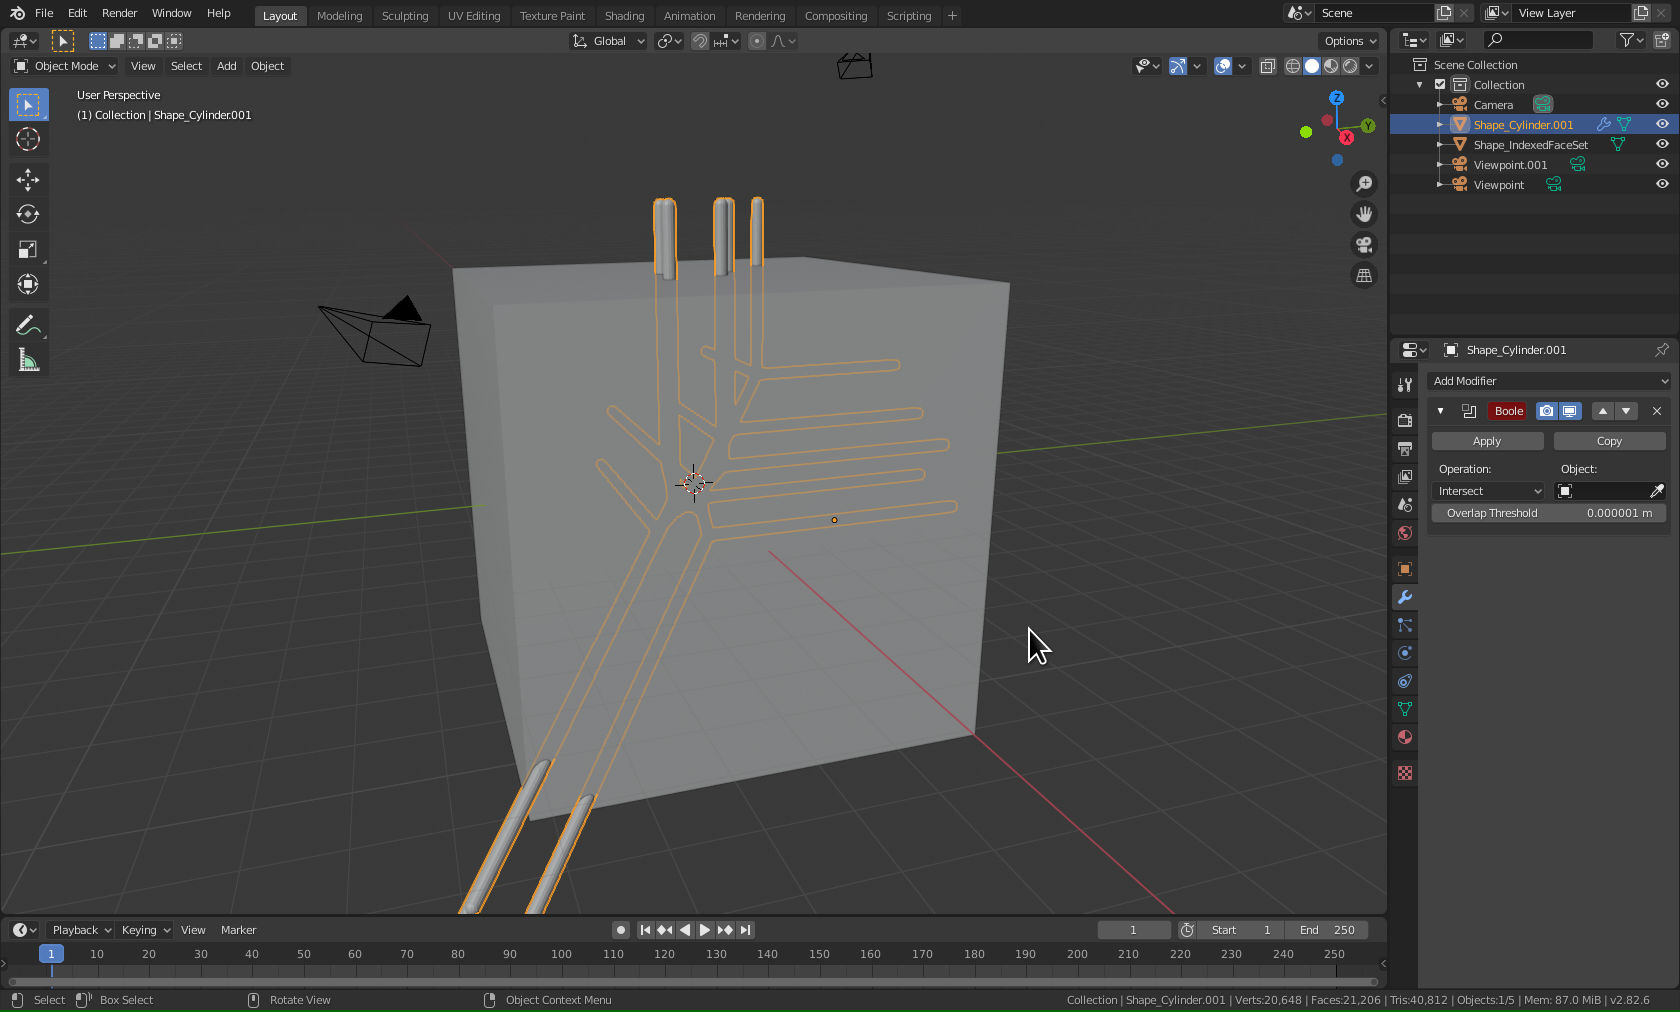
    
5. Choose the cube object to intersect with.
    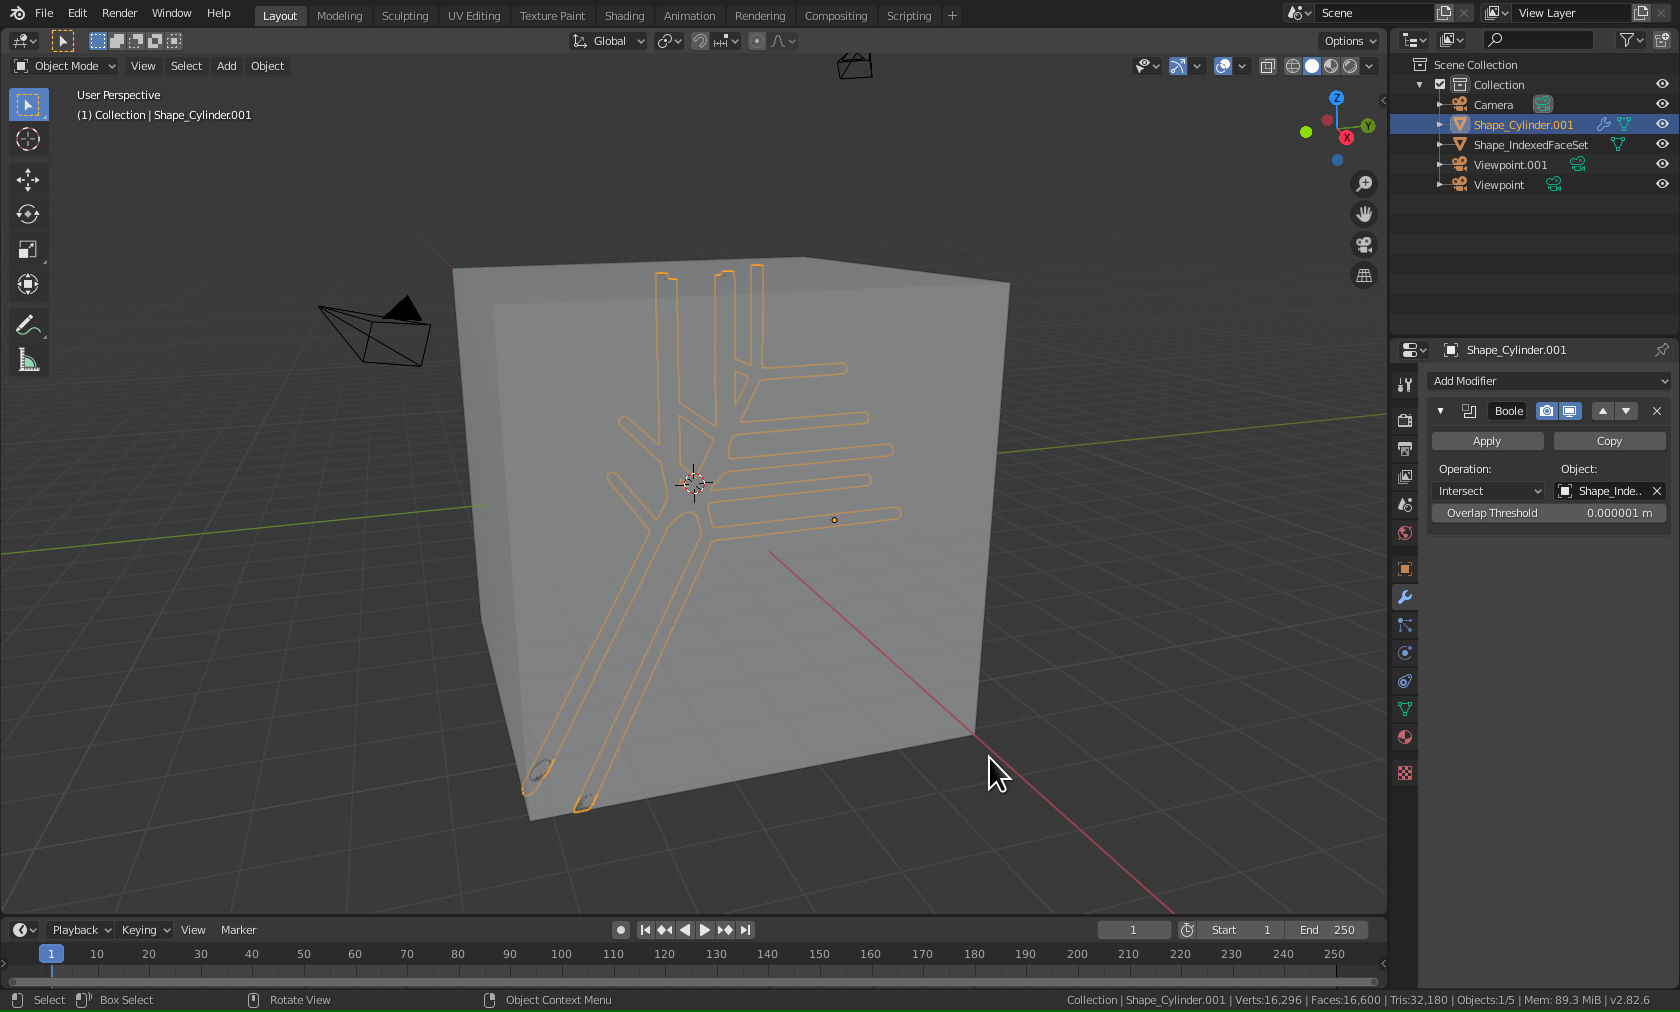
        
5. After clicking on apply you can delete the bounding cube and import the (solidified) cubic. 
    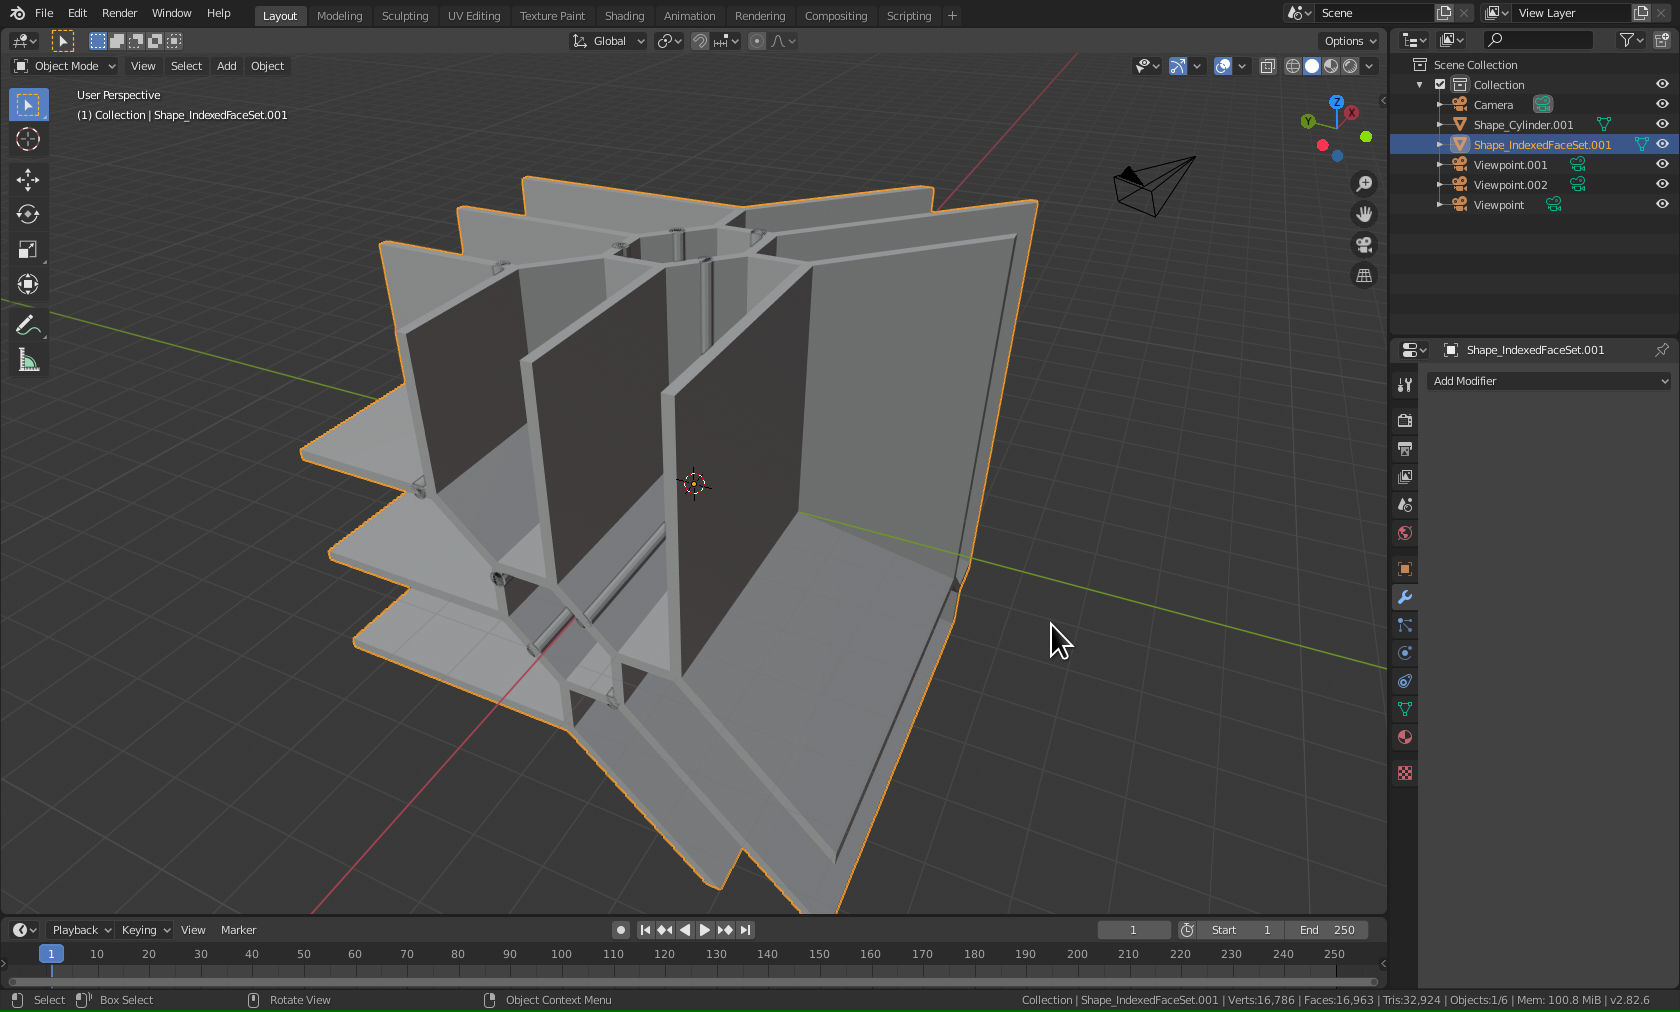

## Tropical lines on tropical cubic surfaces

Polymake is capable of computing all tropical lines on a given tropical cubic surface. Here is how you make a model out of it

In [14]:
$mCubic2 = [ [3,0,0,0], [0,3,0,0], [0,0,3,0], [0,0,0,3],
            [1,1,1,0], [1,1,0,1], [1,0,1,1], [0,1,1,1],
            [2,1,0,0], [2,0,1,0], [2,0,0,1],
            [1,2,0,0], [1,0,2,0], [1,0,0,2],
            [0,2,1,0], [0,2,0,1], [0,1,2,0],
            [0,1,0,2], [0,0,2,1], [0,0,1,2]];
$cCubic2 = [3,3,3,3,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1];
$TCubic2 = new Hypersurface<Min>(MONOMIALS=>$mCubic2, COEFFICIENTS=>$cCubic2);
$linesInCubic = lines_in_cubic($TCubic->POLYNOMIAL);
@lines = map { $_->representative } @{$linesInCubic->all_families};

In this model we are going to use the bounding cube intersection frame (as in a previous section) to round the edges of the surface. We will also keep the spheres as caps for our lines, hence the model will be one lines diameter bigger than the actual bounding box.

In [15]:
$bFacets = polytope::bounding_box_facets($TCubic2->affine_chart->VERTICES,surplus_k=>0.4, make_cube=>1);
$diam = $bFacets->[0]->[0] + $bFacets->[1]->[0];
$total_mm = 100;  #planned size of the model   
$surface_mm = 2;
$frame_mm = $surface_mm;
$lines_mm = 3;

$surface_abs = ($surface_mm*$diam/$total_mm)/(1-$lines_mm/$total_mm);
$frame_diam = ($frame_mm*$diam/$total_mm)/(1-$lines_mm/$total_mm);
$lines_diam = ($lines_mm*$diam/$total_mm)/(1-$lines_mm/$total_mm);
$surface_opts = {VertexStyle=>'hidden',EdgeStyle=>'hidden'};
$frame_opts = x3dprint_curve_opts($frame_diam,$frame_diam);
$lines_opts = x3dprint_curve_opts($lines_diam,$lines_diam);

$bPolytope = new polytope::Polytope(FACETS=>$bFacets);
$bComplex = new fan::PolyhedralComplex(fan::check_fan_objects(($bPolytope)));

Please note that, in contrast to the examples before, the cubic is bound before solidifying. Otherwise the frame won't fit correctly

In [16]:
$TCubic2Bounded = pcom_common_ref($TCubic2->affine_chart,$bComplex);
$solidifiedTCubic2Cells = solidify_2d_pcom($TCubic2Bounded,$surface_abs);
@solidifiedTCubic2CellsVis = map { $_->VISUAL($surface_opts) } @$solidifiedTCubic2Cells;

# the frame
$c2frame = pcom_common_ref($TCubic2->affine_chart, $bPolytope->BOUNDED_COMPLEX);
$c2frameVis = $c2frame->VISUAL($frame_opts);

# the lines
$bPolytope = new polytope::Polytope(FACETS=>$bFacets);
@linesBounded = map { pcom_common_ref($_->affine_chart,$bComplex) } @lines;
@linesVis = map { $_->VISUAL($lines_opts) } @linesBounded;
x3d(compose(@solidifiedTCubic2CellsVis,$c2frameVis,@linesVis),File=>$x3d_dir."LinesInTCubic2SolidifiedRadiused.x3d");

Which looks like this in blender
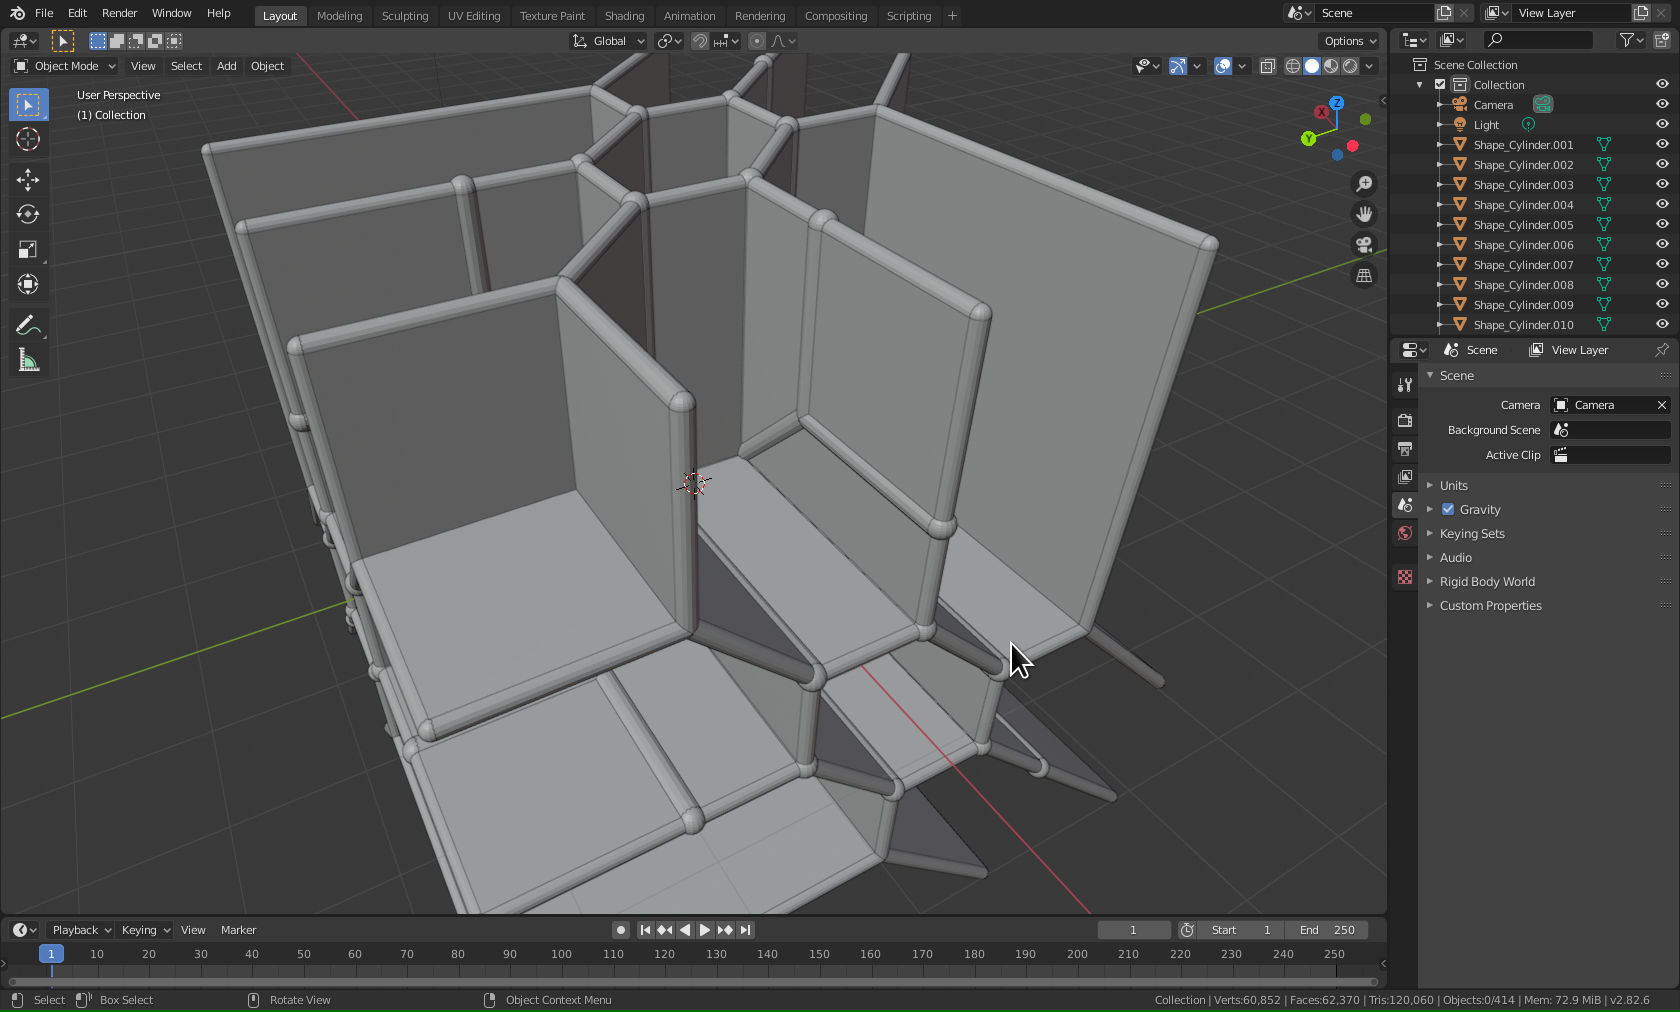